# LLM1DO Exploring Prisoners’ Voices: Keyword and Topics Analysis of CarteBollate Journals (2009-2024) - Progetto Introduzione all'Intelligenza Artificiale 2024/2025

## Obiettivo
Analizzare il dataset della collezione di documenti denominata "carteBollate" con l'obiettivo di ricavare, visualizzare e confrontare le parole chiavi raggruppate da article, year, topic, issue.

## Import dataset

In [8]:
import pandas as pd

df = pd.read_csv('../dataset/prison_corpus.tsv', sep='\t', header=0)

In [9]:
df

,Unnamed: 0,year,issue,topic,article,text
0,0,2009,2,fa’ la cosa giusta,Un post-it per parlare col carcere,Un post-it per parlare col carcere una fiera ...
1,1,2009,2,fa’ la cosa giusta,Made in galera ricetta di successo,"Made in galera, ricetta di successo fà la cos..."
2,2,2009,2,fa’ la cosa giusta,"Equo & solidale, occhio ai prezzi","Equo & solidale, occhio ai prezzi Consumare m..."
3,3,2009,2,fa’ la cosa giusta,Quando l’immaginazione dà libertà,Quando l’immaginazione dà libertà I detenuti ...
4,4,2009,2,fa’ la cosa giusta,È la stampa bellezza e assomiglia all’Italia,È la stampa bellezza e assomiglia tanto all’It...
...,...,...,...,...,...,...
1868,1868,2024,2,"Il Brigantino, una collana corsara",Lo dirige Irina Bajini,"Lo dirige Irina Bajini Il Brigantino, che ha ..."
1869,1869,2024,2,"Il Brigantino, una collana corsara",lo coordina Giovanni Baiocchetti,"Il Brigantino, che ha sede nel IV reparto dell..."
1870,1870,2024,1,Giustizia & carcere,False dichiarazioni degli extracomunitari prov...,Il numero degli stranieri detenuti a Bollate è...
1871,1871,2024,1,Giustizia & carcere,Senza identità e senza diritti,Il numero degli stranieri detenuti a Bollate è...


## Raggruppamento per Articoli

In [ ]:
grouped_by_article = df.groupby("article")["text"].agg(" ".join).reset_index()
grouped_by_article

## Raggruppamento per Tematiche

In [ ]:
grouped_by_topic = df.groupby("topic")["text"].agg(" ".join).reset_index()
grouped_by_topic

## Raggruppamento per Issue

In [ ]:
grouped_by_issue = df.groupby("issue")["text"].agg(" ".join).reset_index()
grouped_by_issue

## Raggruppamento per Year

In [ ]:
grouped_by_year = df.groupby("year")["text"].agg(" ".join).reset_index()
grouped_by_year

## Analisi Esplorativa dei Dati
Data in input una lista di documenti, vengono calcolate le medie statistiche del numero di parole e frasi contenute in tali doucmenti.

In [ ]:
import statistics

def explorative_analysis(documents: list[str]) -> tuple[float, float]:
  count_word_in_sentences = []
  count_sentence_in_docs = []

  for doc in documents:
    num_sen = len([sen for sen in doc.split('.')])
    count_sentence_in_docs.append(num_sen)
    for sen in doc.split('.'):
      num_word = len([word for word in sen.split(' ')])
      count_word_in_sentences.append(num_word)

  return [statistics.mean(count_word_in_sentences), statistics.mean(count_sentence_in_docs)]


In [ ]:
explorative_analysis(df['text']), explorative_analysis(df['article'])

## Import librerie NLTK

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

## Preprocessing del testo
Preprocessa il testo dato in input nel seguente modo:
1. tokenizza il testo in parole
2. converte le parole in minuscolo
3. rimuove la punteggiatura e i caratteri non alfanumerici
4. lemmatizza ogni parola

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('italian'))
lemmatizer = WordNetLemmatizer()

#This function preprocesses the text given in input
def preprocess_text(text: str) -> str:
    tokens = word_tokenize(text, language='italian')
    cleaned_tokens = [
        lemmatizer.lemmatize(word.lower())
        for word in tokens
        if word.isalnum() and word.lower() not in stop_words and word not in string.punctuation
    ]

    return " ".join(cleaned_tokens)

Viene effettuato il preprocessing di tutti i contenuti degli articoli sulla base dello specifico campo fornito in input

In [ ]:
def get_cleaned_documents(column: str):
  return [preprocess_text(doc) for doc in df[column]]

In [ ]:
cleaned_text_documents = get_cleaned_documents('text')
cleaned_article_documents = get_cleaned_documents('article')

## Estrazione delle Keywords
Viene effettuata l'estrazione delle parole chiavi dei testi dati in input mediante l'approccio TF - IDF, che è una tecnica fondamentale per rappresentare il testo in formato numerico utilizzata anche per il Natural Language Processing (NLP). Tale tecnica è stata adottata in modo da valutare l'importanza di un documento rispetto al set di documenti.
#### Term Frequency (TF)
Misura la frequenza di una parola in un singolo documento.

TF(t, d) = (Freqenza di t in d)/(Numero totale di termini in d)
#### Inverse Document Frequency (IDF)
Misura quanto una parola è rara nell'intero corpus. Più è rara, maggiore sarà il suo peso.

IDF(t,D) = log(1+DF(t))
#### TF-IDF Term Frequency - Inverse Document Frequency

TF−IDF(t,d,D) = TF(t,d)⋅IDF(t,D)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords_tfidf(texts, top_n=15):
    # Preprocess the text
    preprocessed_texts = [preprocess_text(text) for text in texts]

    # Vectorize the text with TF-IDF
    vectorizer = TfidfVectorizer(max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

    # Get the feature names (words) and sort by importance (TF-IDF score)
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1

    # Create a list of (word, score) tuples
    word_scores = list(zip(feature_names, scores))
    word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

    # Extract the top N keywords
    keywords = [(word, score) for word, score in word_scores[:top_n]]
    return keywords

In [ ]:
kw_text = extract_keywords_tfidf(cleaned_text_documents)
kw_article = extract_keywords_tfidf(cleaned_article_documents, 3)

## Estrazione N - grams
Genera le n-grams più frequenti da un elenco di testi utilizzando il CountVectorizer.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_n_grams(texts, ngram = 3, top_n = 25):
  # Initialize CountVectorizer for ngrams
  vectorizer = CountVectorizer(ngram_range=(ngram, ngram), stop_words=stopwords.words('italian'))

  # Fit and transform the text
  X = vectorizer.fit_transform(texts)

  # Get n-gram feature names and their counts
  ngrams = vectorizer.get_feature_names_out()
  counts = X.toarray().sum(axis=0)

  # Sort and display the most common ngrams
  sorted_ngrams = sorted(zip(ngrams, counts), key=lambda x: x[1], reverse=True)

  return sorted_ngrams[:top_n]

## Visualizzazione delle Keywords
Si utilizza la WordCloud per visualizzare le keywords.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(width = 500, height = 500, background_color = "white").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return wordcloud

In [ ]:
kw_text_dict = dict(kw_text)
kw_article_dict = dict(kw_article)

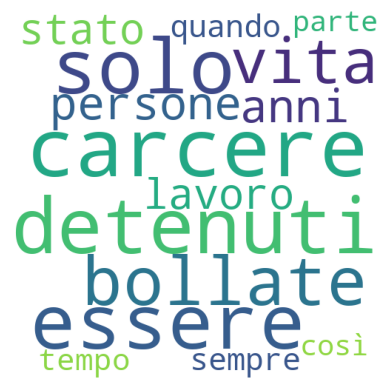

In [26]:
generate_wordcloud(" ".join(list(kw_text_dict.keys())))

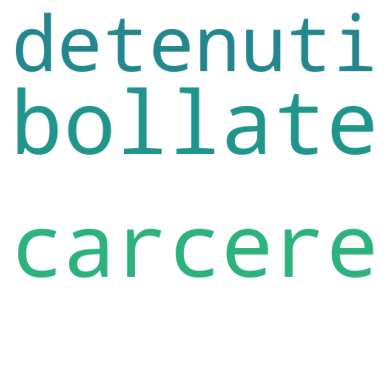

In [27]:
generate_wordcloud(" ".join(list(kw_article_dict.keys())))

## Compare
Si confrontano due insiemi di parole chiave individuando
1. le parole chiave comuni a entrambi
2. le parole chiave uniche del primo insieme
3. le parole chiave uniche del secondo insieme

In [ ]:
def compare_words(kw1, kw2):
   # Common keywords (intersection)
  common_keywords = set(kw1.keys()) & set(kw2.keys())

  # Unique keywords in each analysis
  unique_to_1 = set(kw1.keys()) - set(kw2.keys())
  unique_to_2 = set(kw2.keys()) - set(kw1.keys())

  print(f"Common keywords: {common_keywords}")
  print(f"Unique text keywords: {unique_to_1}")
  print(f"Unique article keywords: {unique_to_2}")

In [ ]:
compare_words(kw_text_dict, kw_article_dict)

Confronta i punteggi associati a parole chiave comuni in due dizionari e visualizza i risultati in un grafico a barre. I punteggi vengono normalizzati per garantire una migliore comparazione.

In [ ]:
def compare_score(kw1, kw2):
  common_keywords = set(kw1.keys()) & set(kw2.keys())

  # Normalize score for better visualization
  text_score_array = list(kw1.values())
  article_score_array = list(kw2.values())
  text_mean = statistics.mean(text_score_array)
  article_mean = statistics.mean(article_score_array)
  text_standard_deviation = statistics.stdev(text_score_array)
  article_standard_deviation = statistics.stdev(article_score_array)

  # Compare scores for common keywords
  score_comparison = {
    word: (abs((kw1[word] - text_mean) / text_standard_deviation), abs((kw2[word] - article_mean) / article_standard_deviation))
    for word in common_keywords
  }

  # Create DataFrame for comparison
  df = pd.DataFrame(score_comparison, index=["Text", "Article"]).T

  # Plot bar chart
  df.plot(kind="bar", figsize=(10,5), title="Keyword Score Comparison")
  plt.ylabel("TF-IDF Score")
  plt.xticks(rotation=45)
  plt.grid()
  plt.show()

In [ ]:
compare_score(kw_text_dict, kw_article_dict)

Confronta la similarità tra due insiemi di parole chiave utilizzando la similarità del coseno basata su TF-IDF. La similarità del coseno è una misura di somiglianza tra due vettori numerici, che può essere utilizzata per confrontare documenti, set di parole o qualsiasi altro tipo dato che può essere rappresentato come vettore. Dati due vettori A e B, la similiarità del coseno viene calcolata attraverso la seguente formula

cosine_similarity(A, B) = (A * B)/ ||A||*||B||

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def compare_similarity(kw1, kw2):
  # Convert keywords to a single string
  text_1 = " ".join(kw1.keys())
  text_2 = " ".join(kw2.keys())

  # Compute TF-IDF and similarity
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform([text_1, text_2])
  similarity = cosine_similarity(tfidf_matrix)[0, 1]

  print(f"Keyword Similarity Score: {similarity:.2f}")

In [ ]:
compare_similarity(kw_text_dict, kw_article_dict)

## Analisi lessicale

In [ ]:
explorative_analysis(df['text'])

In [40]:
!python -m spacy download it_core_news_lg

     ---------------------------------------- 0.0/567.9 MB ? eta -:--:--
     ---------------------------------------- 1.0/567.9 MB 6.3 MB/s eta 0:01:31
     ---------------------------------------- 2.1/567.9 MB 5.9 MB/s eta 0:01:37
     ---------------------------------------- 3.1/567.9 MB 5.8 MB/s eta 0:01:38
     ---------------------------------------- 4.5/567.9 MB 5.7 MB/s eta 0:01:39
     ---------------------------------------- 5.5/567.9 MB 5.7 MB/s eta 0:01:39
     ---------------------------------------- 6.8/567.9 MB 5.7 MB/s eta 0:01:38
      --------------------------------------- 7.9/567.9 MB 5.7 MB/s eta 0:01:38
      --------------------------------------- 8.9/567.9 MB 5.7 MB/s eta 0:01:38
      -------------------------------------- 10.2/567.9 MB 5.7 MB/s eta 0:01:38
      -------------------------------------- 11.3/567.9 MB 5.7 MB/s eta 0:01:38
      -------------------------------------- 12.3/567.9 MB 5.7 MB/s eta 0:01:38
      -------------------------------------- 13

In [41]:
pip install networkx

Viene effettuata l'analisi lessicale del testo attraverso la rappresentazione grafica delle parole basata sulle POS (Part Of Speech), utilizzando la libreria spacy (per analisi linguistica) e networkx (per la visualizzazione di relazioni tra le parole).

In [ ]:
import spacy
import networkx as nx

# Load the Italian spacy model
nlp = spacy.load("it_core_news_lg")

# Example text (replace with your cleaned text documents)
text = " ".join(list(kw_text_dict.keys()))

# Process the text with spacy to get the POS tagging
doc = nlp(text)

# Create a graph
G = nx.Graph()

# Add nodes with word and POS tag as attributes
for token in doc:
    G.add_node(token.text, pos=token.pos_)

# Add edges between words with the same POS tag to form clusters
for token1 in doc:
    for token2 in doc:
        if token1 != token2 and token1.pos_ == token2.pos_:
            G.add_edge(token1.text, token2.text)

# Define a color map for POS tags
color_map = {
    "DET": "blue",      # Determiners
    "NOUN": "green",    # Nouns
    "VERB": "red",      # Verbs
    "ADV": "orange",    # Adverbs
    "ADJ": "purple",    # Adjectives
    "PRON": "pink",     # Pronouns
    "ADP": "cyan",      # Adpositions (Prepositions, Conjunctions)
    "NUM": "brown"      # Numerals
}

# Assign colors based on POS tags
node_colors = [color_map.get(G.nodes[node]["pos"], "gray") for node in G.nodes]

layout = nx.spring_layout(G, seed=42, k=10, iterations=300)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color=node_colors, font_weight="bold", node_size=3000, font_size=12, font_color="white", edge_color="gray", pos=layout)

# Add title
plt.title("Word Clusters by POS Tags", fontsize=16)

# Add the legend for the POS tags and their respective colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pos], markersize=10) for pos in color_map]
labels = [pos for pos in color_map]
plt.legend(handles=handles, labels=labels, title="POS Tags", loc="upper left", fontsize=12)

# Display the plot
plt.show()

## Analisi sentimentale

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from collections import Counter

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def analyze_sentiment(text, device=0):  # device=-1 means CPU, device=0 for GPU

    LABEL_MAPPING = {
      "1 star": "Very Negative",
      "2 stars": "Negative",
      "3 stars": "Neutral",
      "4 stars": "Positive",
      "5 stars": "Very Positive"
    }

    # Initialize the sentiment analysis pipeline
    sentiment_analyzer = pipeline('sentiment-analysis',
                                  model=model,
                                  tokenizer=tokenizer,
                                  device=device)

    # Analyze sentiment
    res = [{ "sentiment": LABEL_MAPPING[item["label"]], "score": item["score"] } for item in sentiment_analyzer(text)]

    return res


In [ ]:
import math
from collections import defaultdict
from nltk import sent_tokenize

def process_sentiment_analysis(documents: list, max_length: int = 520):
    """
    Process sentiment analysis on each document, splitting if necessary,
    and calculate the mean score for each sentiment group.
    """

    sentiment_results = []

    for doc in documents:

        if len(doc) > max_length:
          chunked_sentiments = []

          for splitted_doc in sent_tokenize(doc, 'italian'):
            if (len(splitted_doc) > max_length):
              chunked_sentiments.append(analyze_sentiment(splitted_doc[0:520]))
            else:
              chunked_sentiments.append(analyze_sentiment(splitted_doc))

          # Aggregate sentiment scores
          aggregated_scores = defaultdict(float)
          sentiment_counts = defaultdict(int)

          for s in chunked_sentiments:
              aggregated_scores[s[0]["sentiment"]] += s[0]["score"]
              sentiment_counts[s[0]["sentiment"]] += 1

          # Compute mean
          final_sentiment = [{"sentiment": key, "score": aggregated_scores[key] / sentiment_counts[key]} for key in aggregated_scores]
          for el in final_sentiment:
            sentiment_results.append(el)

        else:
          sentiment_results.append(analyze_sentiment(doc))

    return sentiment_results


In [46]:
sentiment_analysis = process_sentiment_analysis(df['text'])

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set

KeyboardInterrupt: 

In [ ]:
sentiment_analysis

[{'sentiment': 'Very Positive', 'score': 0.4937594011425972},
 {'sentiment': 'Neutral', 'score': 0.3199043944478035},
 {'sentiment': 'Negative', 'score': 0.4484050750732422},
 {'sentiment': 'Very Negative', 'score': 0.4751864969730377},
 {'sentiment': 'Positive', 'score': 0.31698282063007355},
 {'sentiment': 'Very Positive', 'score': 0.47994009209306615},
 {'sentiment': 'Positive', 'score': 0.3619267284870148},
 {'sentiment': 'Very Negative', 'score': 0.26327995210886},
 {'sentiment': 'Neutral', 'score': 0.41807878017425537},
 {'sentiment': 'Very Positive', 'score': 0.3739848881959915},
 {'sentiment': 'Negative', 'score': 0.4003186722596486},
 {'sentiment': 'Neutral', 'score': 0.39498826265335085},
 {'sentiment': 'Very Negative', 'score': 0.46967008113861086},
 {'sentiment': 'Positive', 'score': 0.33647578954696655},
 {'sentiment': 'Very Positive', 'score': 0.4395430775789114},
 {'sentiment': 'Very Negative', 'score': 0.47826852401097614},
 {'sentiment': 'Positive', 'score': 0.44094188

In [ ]:
import numpy as np

# Sentiment mapping
sentiment_mapping = {
    "Very Negative": 0,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 3,
    "Very Positive": 4
}

# Extract sentiment and scores
x_values = [
    sentiment_mapping[item[0]["sentiment"] if isinstance(item, list) else item["sentiment"]]
    for item in sentiment_analysis
]
y_values = [item[0]["score"] if isinstance(item, list) else item["score"] for item in sentiment_analysis]

# Create the hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(x_values, y_values, gridsize=10, cmap='YlGnBu', mincnt=1, extent=(0, 4, 0, 1))

# Add colorbar
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Sentiment Analysis Hexbin Plot')

# Adjust x-axis ticks
plt.xticks(np.arange(5), ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'], rotation=45)

# Show plot
plt.show()